# Wright-Fisher Simulator
#### Chris Porras

In [303]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)
%matplotlib inline

### WF simulator for a single deme
Simulates allele frequency changes in a haploid population of size N based on a Wright-Fisher model with the following parameters:<br>
    $s$ is the selection coefficient or selection rate for purifying selection <br>
    $\mu$ is the mutation rate

In [318]:
def WF_sim(N,mu,s,num_reps,num_gen,p0):
    f = np.zeros((num_gen+1,num_reps))
    f[0] = [p0]*num_reps
    for j in range(num_gen):
        p = f[j]+mu*(1-2*f[j])-s*f[j]*(1-f[j])
        f[j+1]= np.random.binomial(N,p)/N
    return f

In [317]:
# Define parameters for single deme
s = 10**-2 # selection rate
N = 10**3 # population size
mu = 10**-4 # mutation rate
num_reps = 100 # number of independent sites simulated
num_gen = 2* 10**3 # number of simulation generations
p0 = 0.5 # initial allele frequency

In [319]:
f = WF_sim(N,mu,s,num_reps,num_gen,p0)

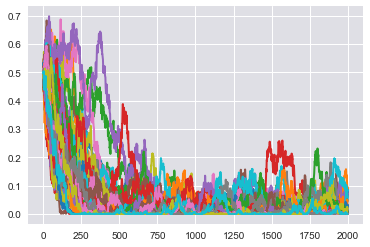

In [320]:
plt.plot(f)
plt.show()

### WF Simulator with stepping stone migration
Introduces migration as per the Kimura stepping stone model. Simulates a 1D ring of demes, or subpopulations connected by a symmettric migration rate $m$.

In [323]:
def SS_WF_sim(N,mu,s,m,num_reps,num_gen,num_demes,p0):
    f = np.zeros((num_gen+1,num_reps,num_demes))
    f[0] = np.repeat(np.repeat(p0,num_reps),
                     num_demes).reshape(num_reps,num_demes)
    for j in range(num_gen):
        for i in range(num_demes):
            if (i+1) >= num_demes:
                i = i - num_demes
            df = mu*(1-2*f[j,:,i])-s*f[j,:,i]*(1-f[j,:,i])+m*(f[j,:,i-1]+f[j,:,i+1]-2*f[j,:,i])
            p = f[j,:,i] + df
            f[j+1,:,i]= np.random.binomial(N,p)/N
    return f

In [327]:
# Define parameters for 1D chain of demes
s = 0 # selection rate
N = 10**3 # population size
mu = 10**-4 # mutation rate
m = 0.1 # migration rate
num_demes = 5 # number of demes simulated
num_reps = 100 # number of independent sites simulated
num_gen = 2* 10**3 # number of simulation generations
p0 = 0.5 # initial allele frequency

In [328]:
f = SS_WF_sim(N,mu,s,m,num_reps,num_gen,num_demes,p0)

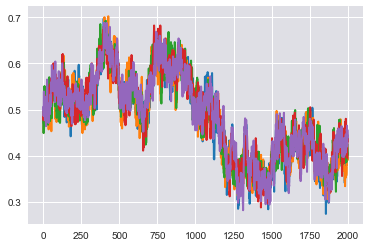

In [329]:
for r in range(num_demes):
    plt.plot(f[:,0,r], color=sns.color_palette()[r])
plt.show()